# Titanic Problem
## A Simple Model based on only Gender

In [1]:
import pandas as pd
import numpy as np
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import csv as csv
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
training_data = pd.read_csv('train.csv')

In [3]:
training_data.info()
training_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data = training_data.as_matrix()

/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [6]:
print data

[[1 0 3 ... 7.25 nan 'S']
 [2 1 1 ... 71.2833 'C85' 'C']
 [3 1 3 ... 7.925 nan 'S']
 ...
 [889 0 3 ... 23.45 nan 'S']
 [890 1 1 ... 30.0 'C148' 'C']
 [891 0 3 ... 7.75 nan 'Q']]


In [7]:
## Calculating the proportion of survivors in the titanic
passengers = np.size(data[0:,1].astype(np.float))
survived = np.sum(data[0:,1].astype(np.float))
proportion = survived/passengers
print proportion

0.3838383838383838


In [8]:
## Segerating the data on the basis of gender
women_stats = data[0::,4] == "female"
men_stats = data[0::,4] != "female"

In [9]:
## Using the index obtained from above to find the number of men and women survived
women_onboard = data[women_stats,1].astype(np.float)
men_onboard = data[men_stats,1].astype(np.float)
women_survived = np.sum(women_onboard)/np.size(women_onboard)
men_survived = np.sum(men_onboard)/np.size(men_onboard)
print men_survived,women_survived

0.18890814558058924 0.7420382165605095


In [10]:
test = pd.read_csv('test.csv')
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test_data = test.as_matrix()
print test_data

[[892 3 'Kelly, Mr. James' ... 7.8292 nan 'Q']
 [893 3 'Wilkes, Mrs. James (Ellen Needs)' ... 7.0 nan 'S']
 [894 2 'Myles, Mr. Thomas Francis' ... 9.6875 nan 'Q']
 ...
 [1307 3 'Saether, Mr. Simon Sivertsen' ... 7.25 nan 'S']
 [1308 3 'Ware, Mr. Frederick' ... 8.05 nan 'S']
 [1309 3 'Peter, Master. Michael J' ... 22.3583 nan 'C']]


/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
yPred = np.zeros((np.size(test_data[:,1]),1))
i = 0
for row in test_data:
    if row[3] == "female":
        yPred[0][i] = 1

In [13]:
## Saving the data in the prediction.csv
i = 892
file_handle = open("output.csv","wb")
fp = csv.writer(file_handle)
fp.writerow(["PassengerId","Survived"])
for row in yPred:
    x = row[0].astype(np.int)
    fp.writerow([i,x])
    i += 1

## A More Complex Model based on Gender & Price

In [14]:
## Finding out the required parameters and dividing the fare into specific sizes
fare_ceiling = 40
data[data[0::,9].astype(np.float) >= fare_ceiling,9] = fare_ceiling - 1.0
fare_bracket_size = 10
price_brackets = fare_ceiling/fare_bracket_size
classes = len(np.unique(data[::,2]))

In [15]:
## Initializing the survival table and appending the men/women stats
survival_table = np.zeros((2,classes,price_brackets))
print "Shape of the matrix: "+str(np.shape(survival_table))
for i in xrange(classes):
    for j in xrange(price_brackets):
        women_only_stats = data[(data[::,4] == 'female') & (data[::,9].astype(np.float) >= j*fare_bracket_size)
                                & (data[::,9].astype(np.float) < (j+1)*fare_bracket_size) & (data[::,2] == i+1),1]
        men_only_stats = data[(data[::,4] != 'female') & (data[::,9].astype(np.float) >= j*fare_bracket_size)
                                & (data[::,9].astype(np.float) < (j+1)*fare_bracket_size) & (data[::,2] == i+1),1]
        survival_table[0,i,j] = np.mean(women_only_stats.astype(np.float))
        survival_table[1,i,j] = np.mean(men_only_stats.astype(np.float))
print "The Survival Table looks as follows" + str(survival_table)
        

Shape of the matrix: (2, 3, 4)
The Survival Table looks as follows[[[       nan        nan 0.83333333 0.97727273]
  [       nan 0.91428571 0.9        1.        ]
  [0.59375    0.58139535 0.33333333 0.125     ]]

 [[0.                nan 0.4        0.38372093]
  [0.         0.15873016 0.16       0.21428571]
  [0.11153846 0.23684211 0.125      0.24      ]]]


/home/arif/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/arif/.local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
## Throwing out all the NAN values
survival_table[survival_table != survival_table] = 0
print survival_table

[[[0.         0.         0.83333333 0.97727273]
  [0.         0.91428571 0.9        1.        ]
  [0.59375    0.58139535 0.33333333 0.125     ]]

 [[0.         0.         0.4        0.38372093]
  [0.         0.15873016 0.16       0.21428571]
  [0.11153846 0.23684211 0.125      0.24      ]]]


In [17]:
## Assigning the threshold value so as to create a probabilistic distribution
survival_table[survival_table < 0.5] = 0
survival_table[survival_table >= 0.5] = 1
print survival_table

[[[0. 0. 1. 1.]
  [0. 1. 1. 1.]
  [1. 1. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [18]:
## OPpening the CSV file and assigning the header
test_file = open('test.csv', 'rb')
test_file_object = csv.reader(test_file)
header = test_file_object.next()
predictions_file = open("output2.csv", "wb")
p = csv.writer(predictions_file)
p.writerow(["PassengerId", "Survived"])

In [20]:
# ## Predicting the data on the basis of gender and ticket using the Survival_table
# for row in test_file_object:
#     for j in xrange(price_brackets):
#         try:
#             row[8] = float(row[8])
#         except:
#             bin_fare = 3 - float(row[1])
#             break
#         if(row[8] > fare_ceiling):
#             bin_fare = price_brackets - 1
#             break
#         if(row[8] >= j*fare_bracket_size and row[8] < (j+1)*fare_bracket_size):
#             bin_fare = j
#             break
#     if(row[3] == 'female'):
#         p.writerow([row[0],"%d"%int(survival_table[0,float(row[1]) - 1,bin_fare])])
#     else:
#         p.writerow([row[0],"%d"%int(survival_table[1, float(row[1])-1, bin_fare])])
# test_file.close()
# predictions_file.close()

## Exploring the Pandas Library

In [21]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
df['Age'][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [26]:
df['Cabin'][:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [27]:
type(df['Age'])

pandas.core.series.Series

In [28]:
df['Age'].mean()

29.69911764705882

In [29]:
df[['Sex','Pclass','Age']].head()

,Sex,Pclass,Age
0,male,3,22.0
1,female,1,38.0
2,female,3,26.0
3,female,1,35.0
4,male,3,35.0


In [30]:
## Where clause using the df command
df[df['Age'] > 60].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [31]:
df[df['Age'].isnull()][['Sex','Pclass','Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


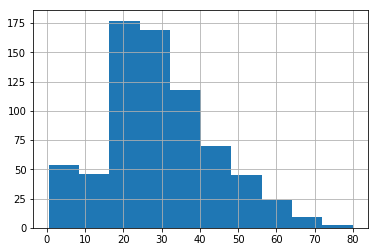

In [32]:
df['Age'].dropna().hist()
plt.show()

In [33]:
df['Gender'] = 4
df['Gender'].head()

0    4
1    4
2    4
3    4
4    4
Name: Gender, dtype: int64

In [34]:
df['Gender'] = df['Sex'].map(lambda x: x[0].upper())
df['Gender'].head()

0    M
1    F
2    F
3    F
4    M
Name: Gender, dtype: object

In [35]:
df['Gender'] = df['Sex'].map({'male':1,'female':0}).astype(int)
df['Gender'].head()

0    1
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [36]:
df['Emb'] = df['Embarked'].map({NaN:0,'C':1,'S':2,'Q':3}).astype(int)
df['Emb'].head()

0    2
1    1
2    2
3    2
4    2
Name: Emb, dtype: int64

In [37]:
## Making an array to store median values of age of each class and gender of passengers
median_ages = np.zeros((2,3))
median_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [38]:
## Filling in the median age for each passenger
for i in xrange(2):
    for j in xrange(3):
        median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[35. , 28. , 21.5],
       [40. , 30. , 25. ]])

In [39]:
df['AgeFill'] = df['Age']
df['AgeFill'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: AgeFill, dtype: float64

In [40]:
for i in xrange(2):
    for j in xrange(3):
        df.loc[(df['Gender'] == i) & (df['Pclass'] == j + 1) & (df['Age'].isnull()),'AgeFill'] = median_ages[i,j]

In [41]:
df[df['Age'].isnull()][['Sex','Pclass','Age','AgeFill']].head()

,Sex,Pclass,Age,AgeFill
5,male,3,NaN,25.0
17,male,2,NaN,30.0
19,female,3,NaN,21.5
26,male,3,NaN,25.0
28,female,3,NaN,21.5


In [42]:
df['AgeisNull'] = pd.isnull(df['Age']).astype(int)
df['AgeisNull'].head()

0    0
1    0
2    0
3    0
4    0
Name: AgeisNull, dtype: int64

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Emb,AgeFill,AgeisNull
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.893378,29.112424,0.198653
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.522387,13.304424,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,2.000000,21.500000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000,26.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,36.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,80.000000,1.000000


In [44]:
## Making new useful features
df['FamilySize'] = df['Parch'] + df['SibSp']

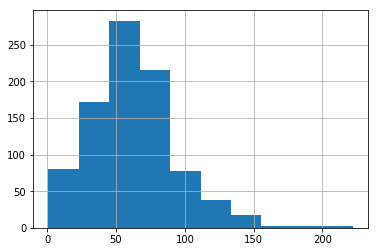

In [45]:
df['Age*Class'] = df['AgeFill']*df['Pclass']
df['Age*Class'].hist()
plt.show()

In [46]:
df.dtypes[df.dtypes.map(lambda x:x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Emb,AgeFill,AgeisNull,FamilySize,Age*Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.893378,29.112424,0.198653,0.904602,62.614860
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.522387,13.304424,0.399210,1.613459,31.362024
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.920000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,2.000000,21.500000,0.000000,0.000000,40.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000,26.000000,0.000000,0.000000,63.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,36.000000,0.000000,1.000000,75.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,80.000000,1.000000,10.000000,222.000000


In [48]:
df = df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis = 1)

In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Emb,AgeFill,AgeisNull,FamilySize,Age*Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,1.893378,29.112424,0.198653,0.904602,62.614860
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.522387,13.304424,0.399210,1.613459,31.362024
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.920000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,2.000000,21.500000,0.000000,0.000000,40.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,2.000000,26.000000,0.000000,0.000000,63.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000,36.000000,0.000000,1.000000,75.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000,80.000000,1.000000,10.000000,222.000000


In [50]:
df.drop('Age',axis = 1).head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Gender,Emb,AgeFill,AgeisNull,FamilySize,Age*Class
0,1,0,3,1,0,7.2500,1,2,22.0,0,1,66.0
1,2,1,1,1,0,71.2833,0,1,38.0,0,1,38.0
2,3,1,3,0,0,7.9250,0,2,26.0,0,0,78.0
3,4,1,1,1,0,53.1000,0,2,35.0,0,1,35.0
4,5,0,3,0,0,8.0500,1,2,35.0,0,0,105.0


In [51]:
df.dropna().head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Emb,AgeFill,AgeisNull,FamilySize,Age*Class
0,1,0,3,22.0,1,0,7.2500,1,2,22.0,0,1,66.0
1,2,1,1,38.0,1,0,71.2833,0,1,38.0,0,1,38.0
2,3,1,3,26.0,0,0,7.9250,0,2,26.0,0,0,78.0
3,4,1,1,35.0,1,0,53.1000,0,2,35.0,0,1,35.0
4,5,0,3,35.0,0,0,8.0500,1,2,35.0,0,0,105.0


In [52]:
train_data = df.values

In [53]:
print train_data
type(train_data)
print np.shape(train_data)

[[  1.    0.    3.  ...   0.    1.   66. ]
 [  2.    1.    1.  ...   0.    1.   38. ]
 [  3.    1.    3.  ...   0.    0.   78. ]
 ...
 [889.    0.    3.  ...   1.    3.   64.5]
 [890.    1.    1.  ...   0.    0.   26. ]
 [891.    0.    3.  ...   0.    0.   96. ]]
(891, 13)


In [54]:
train_data = train_data[:,1:]
train_data[:,2] = train_data[:,8]

In [55]:
print train_data

[[ 0.   3.  22.  ...  0.   1.  66. ]
 [ 1.   1.  38.  ...  0.   1.  38. ]
 [ 1.   3.  26.  ...  0.   0.  78. ]
 ...
 [ 0.   3.  21.5 ...  1.   3.  64.5]
 [ 1.   1.  26.  ...  0.   0.  26. ]
 [ 0.   3.  32.  ...  0.   0.  96. ]]


## Cleaning the Test Data

In [56]:
df_test = pd.read_csv('test.csv')
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [57]:
## Adding a Gender Column
df_test['Gender'] = df_test['Sex'].map({'male':1,'female':0}).astype(int)
df_test['Gender'].head()

0    1
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64

In [58]:
## Filling up the Age using the median age method
median = np.zeros((2,3))
for i in xrange(2):
    for j in xrange(3):
        median[i,j] = df_test[(df_test['Gender'] == i) & (df_test['Pclass'] == j+1)]['Age'].dropna().median() 
print median

[[41. 24. 22.]
 [42. 28. 24.]]


In [59]:
df_test['AgeisNull'] = pd.isnull(df_test['Age']).astype(int)
df_test['AgeisNull'].head()

0    0
1    0
2    0
3    0
4    0
Name: AgeisNull, dtype: int64

In [60]:
##Using the above found median ages to fill in the null ages in the data
for i in xrange(2):
    for j in xrange(3):
        df_test.loc[(df_test['Gender'] == i) & (df_test['Pclass'] == j + 1) & df_test['Age'].isnull(),'Age'] = median[i,j]
pd.isnull(df_test['Age']).head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [61]:
df_test['Emb'] = df_test['Embarked'].map({NaN:0,'C':1,'S':2,'Q':3}).astype(int)

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Gender         418 non-null int64
AgeisNull      418 non-null int64
Emb            418 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 45.8+ KB


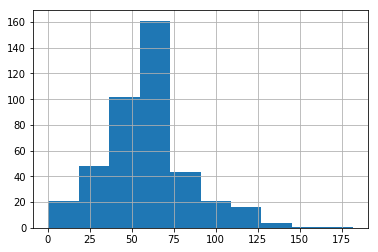

In [63]:
## Adding New Features as we added in the training data
df_test['AgeFill'] = df_test['Age']
df_test['FamilySize'] = df_test['Parch'] + df_test['SibSp']
df_test['Age*Class'] = df_test['Age']*df_test['Pclass']
df_test['Age*Class'].hist()
plt.show()
## Adding mean value in the missing fares
df_test.loc[df_test['Fare'].isnull(),'Fare'] = df_test['Fare'].mean()

In [64]:
df_test = df_test.drop(['Name','Sex','Ticket','Embarked','Cabin'],axis = 1)

In [65]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,AgeisNull,Emb,AgeFill,FamilySize,Age*Class
0,892,3,34.5,0,0,7.8292,1,0,3,34.5,0,103.5
1,893,3,47.0,1,0,7.0000,0,0,2,47.0,1,141.0
2,894,2,62.0,0,0,9.6875,1,0,3,62.0,0,124.0
3,895,3,27.0,0,0,8.6625,1,0,2,27.0,0,81.0
4,896,3,22.0,1,1,12.2875,0,0,2,22.0,2,66.0


In [66]:
test_data = df_test.values
print np.shape(test_data)
test_data = test_data[:,1:]
print test_data

(418, 12)
[[  3.   34.5   0.  ...  34.5   0.  103.5]
 [  3.   47.    1.  ...  47.    1.  141. ]
 [  2.   62.    0.  ...  62.    0.  124. ]
 ...
 [  3.   38.5   0.  ...  38.5   0.  115.5]
 [  3.   24.    0.  ...  24.    0.   72. ]
 [  3.   24.    1.  ...  24.    2.   72. ]]


## Using Random Forests to Predict the Data

In [67]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [68]:
# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

In [69]:
# Fit the training data to the Survived labels and create the decision trees
print np.shape(train_data)
forest = forest.fit(train_data[0::,1::],train_data[0::,0])

(891, 12)


In [70]:
# Take the same decision trees and run it on the test data
output = forest.predict(test_data)
print output,len(output)

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.

## Storing the data into a .csv file

In [71]:
file_handle = open('output4.csv',"w")
prediction_handle = csv.writer(file_handle)
prediction_handle.writerow(['PassengerId','Survived'])
i = 892
for pred in output:
    prediction_handle.writerow([i,int(pred)])
    i += 1

## Using Keras Library to predict the data

In [72]:
## Seperating the data and the labels
X = train_data[:500,1:]
X_cv = train_data[500:,1:]
labels= train_data[:,0]
y = np.zeros((500,2))
y_cv = np.zeros((391,2))

In [73]:
for i in range(500):
    if(labels[i] == 1):
        y[i][1] = 1
    else:
        y[i][0] = 1
for i in range(391):
    if(labels[500 + i] == 1):
        y_cv[i][1] = 1
    else:
        y_cv[i][0] = 1

In [74]:
model = Sequential([
        Dense(32,input_dim=11),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(32),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(32),
        Activation('sigmoid'),
        Dropout(0.25),
        Dense(2),
        Activation('sigmoid'),
    ])

In [99]:
model.compile(optimizer = 'adadelta',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [100]:
hist1 = model.fit(X,y,epochs = 5,batch_size = 32,verbose = 1)

Epoch 1/5
500/500 [==============================] - 0s 715us/step - loss: 0.4233 - acc: 0.8300
Epoch 2/5
500/500 [==============================] - 0s 57us/step - loss: 0.4265 - acc: 0.8240
Epoch 3/5
500/500 [==============================] - 0s 59us/step - loss: 0.4271 - acc: 0.8280
Epoch 4/5
500/500 [==============================] - 0s 54us/step - loss: 0.4175 - acc: 0.8260
Epoch 5/5
500/500 [==============================] - 0s 51us/step - loss: 0.4028 - acc: 0.8380


In [78]:
score = model.evaluate(X_cv,y_cv,batch_size = 32, verbose = 0)
print score

[0.42338941271042885, 0.8056265989227978]


In [79]:
yPred = model.predict_classes(test_data,verbose = 1)

418/418 [==============================] - 0s 118us/step


In [80]:
print yPred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0]


In [81]:
file_handle = open('output_nn.csv',"w")
prediction_handle = csv.writer(file_handle)
prediction_handle.writerow(['PassengerId','Survived'])
i = 892
for pred in yPred:
    prediction_handle.writerow([i,int(pred)])
    i += 1
file_handle.close()

In [82]:
model_new = Sequential([
        Dense(64,input_dim=11),
        Activation('relu'),
        Dropout(0.25),
        Dense(32),
        Activation('relu'),
        Dropout(0.25),
        Dense(32),
        Activation('relu'),
        Dropout(0.25),
        Dense(2),
        Activation('softmax'),
    ])

In [96]:
model_new.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [97]:
hist2=model.fit(X,y,epochs=5,batch_size=32)

Epoch 1/5
500/500 [==============================] - 0s 187us/step - loss: 0.4283 - acc: 0.8300
Epoch 2/5
500/500 [==============================] - 0s 49us/step - loss: 0.4259 - acc: 0.8340
Epoch 3/5
500/500 [==============================] - 0s 54us/step - loss: 0.4188 - acc: 0.8360
Epoch 4/5
500/500 [==============================] - 0s 47us/step - loss: 0.4165 - acc: 0.8440
Epoch 5/5
500/500 [==============================] - 0s 51us/step - loss: 0.4058 - acc: 0.8440


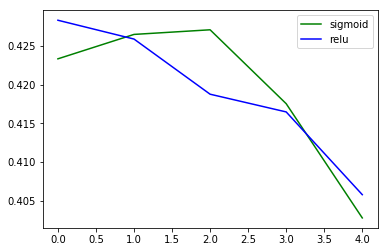

In [101]:
plt.figure(0)
plt.plot(hist1.history['loss'],'g',label='sigmoid')
plt.plot(hist2.history['loss'],'b',label='relu')
plt.legend()
plt.show()